In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os


In [21]:
os.chdir('F:\TopMentor_DataScience\Batch 103 Day 37')
data = pd.read_csv('movie_metadata.csv')
data


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,6,English,Canada,49,49,2013,470,7.7,49.00,84
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,49,49,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,3,English,USA,49,1400,2013,0,6.3,49.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,49,2012,719,6.3,2.35,660


In [15]:
print(data.columns)
data['country'].value_counts()


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


country
USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: count, Length: 66, dtype: int64

In [10]:
print(data.shape)

(5043, 28)


In [93]:
display (data[['director_name','director_facebook_likes']])
#display (data[['director_name']])

,director_name,director_facebook_likes
0,James Cameron,0
1,Gore Verbinski,563
2,Sam Mendes,0
3,Christopher Nolan,22000
4,Doug Walker,131
...,...,...
5038,Scott Smith,2
5039,49,49
5040,Benjamin Roberds,0
5041,Daniel Hsia,0


In [95]:
newdata=data.iloc[:,4:6]
newdata


,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


In [23]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,n_init =10)
kmeans.fit(newdata)
print(kmeans)

KMeans(n_clusters=5, n_init=10)


In [29]:
print('kmeans.cluster_centers_',kmeans.cluster_centers_)
print(kmeans.labels_)

kmeans.cluster_centers_ [[  151.29382199   420.67350785]
 [17621.21212121   596.10606061]
 [  210.77011494 11126.43678161]
 [12490.38461538   605.93269231]
 [17545.45454545 14545.45454545]]
[0 0 0 ... 0 0 0]


In [48]:
lables=pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])
cluster=pd.concat([data, pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])],axis=1)
cluster.head(50)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster-lables
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,0
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,0
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,4
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,12,7.1,49.00,0,0
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000,0
6,Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,...,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0,0
7,Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,English,USA,PG,260000000,2010,553,7.8,1.85,29000,0
8,Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000,2
9,Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,...,English,UK,PG,250000000,2009,11000,7.5,2.35,10000,2


In [40]:
#lables=pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])

In [49]:
cluster.to_csv('KmeansCluster_MovieInfo.csv')

In [64]:
print (len(kmeans.labels_))
print (type(kmeans.labels_))
label, count=np.unique(kmeans.labels_,return_counts=True)
dict(zip(label,count))

5043
<class 'numpy.ndarray'>


{0: 4775, 1: 66, 2: 87, 3: 104, 4: 11}

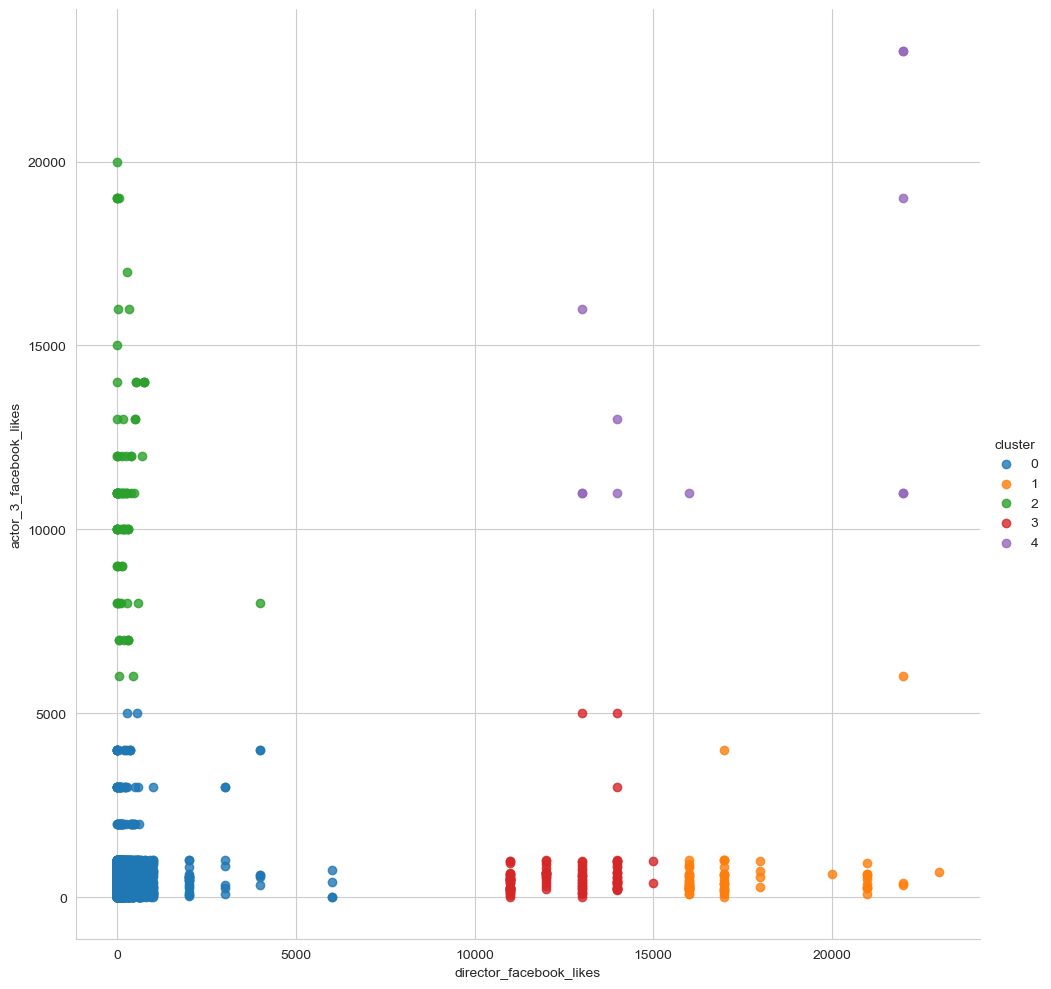

In [88]:
import colorcet as cc # LM plot circle colour 
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',height=10,aspect=1,fit_reg=False)
plt.show()


In [89]:
#plt.scatter(x='director_facebook_likes',y='actor_3_facebook_likes',c='b',data=newdata,hue='cluster')

In [ ]:
plt.scatter

kmeans.cluster_centers_ [[1.12106241e+02 1.84263324e+02 8.88178420e-16]
 [1.24411765e+04 6.04343137e+02 3.00000000e+00]
 [2.11607595e+02 1.15696203e+04 2.00000000e+00]
 [1.75454545e+04 1.45454545e+04 4.54545455e+00]
 [4.28039216e+02 3.98039216e+03 5.00000000e+00]
 [1.75441176e+04 5.98779412e+02 1.00000000e+00]
 [2.03452660e+02 7.09679255e+02 7.18085106e-02]]
[6 6 0 ... 0 6 0]
5043
<class 'numpy.ndarray'>


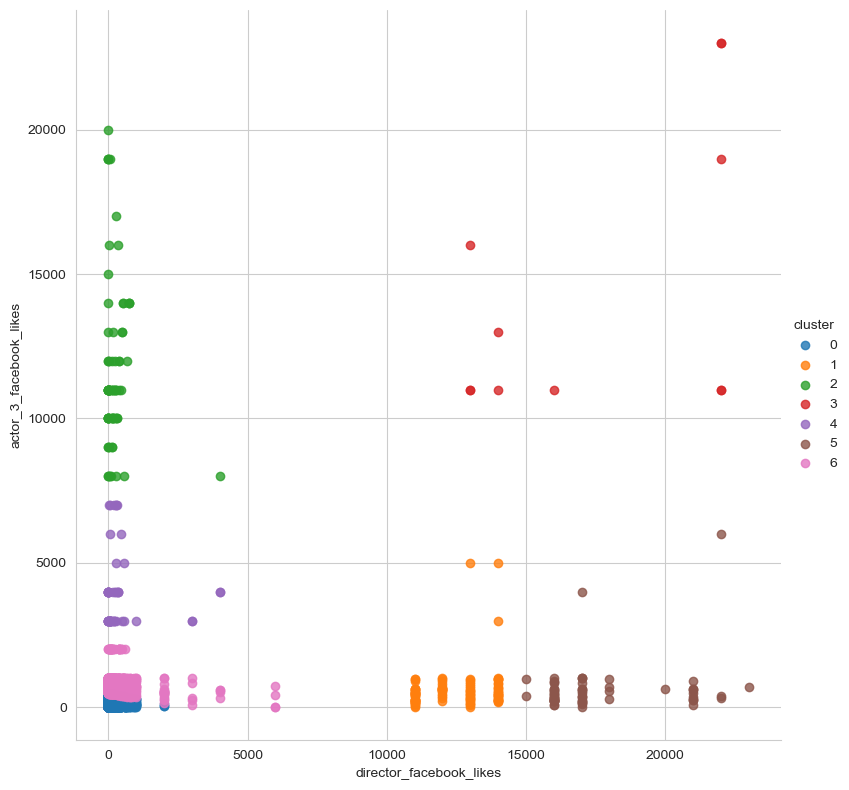

In [92]:
#kmeans with 7 clusters
kmeans=KMeans(n_clusters=7,n_init =10)
kmeans.fit(newdata)
print('kmeans.cluster_centers_',kmeans.cluster_centers_)
print(kmeans.labels_)
#lables=pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])
cluster=pd.concat([data, pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])],axis=1)
cluster.head(50)
print (len(kmeans.labels_))
print (type(kmeans.labels_))
label, count=np.unique(kmeans.labels_,return_counts=True)
dict(zip(label,count))
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',height=8,aspect=1,fit_reg=False)
plt.show()